In [1]:
#Jai Bolo Ganesh Maharaj ki

In [2]:
#CS - 584 Final Project

In [191]:
from gensim.parsing.preprocessing import STOPWORDS
from gensim.models.ldamodel import LdaModel
from gensim.models import lsimodel
from gensim import corpora
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import pickle
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import os
%matplotlib inline
os.chdir("D:\Fall 2017 Sem 3\CS - 584\FINAL PROJECT")

In [192]:
import seaborn as sns

In [193]:
os.chdir("D:\Fall 2017 Sem 3\CS - 584\FINAL PROJECT")

In [194]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')


In [195]:
df = pd.read_csv("state-of-the-union.csv")

In [196]:
df.columns = ["Year","speech"]

In [197]:
df.index = np.arange(1,len(df)+1)

In [10]:
df.head(1)

Year                                             speech
1  1790  \nState of the Union Address\nGeorge Washingto...

In [11]:
#df = df.sort_values(['Year']).groupby(((df.Year//20)*20), sort=False).Speech.apply(''.join).reset_index(name='speech')

# Data Cleaning

In [13]:
df["speech"] = df["speech"].replace('State of the Union Address'," ",regex = True)

In [14]:
df["speech"] = df["speech"].replace("\n"," ",regex = True)

In [15]:
df["speech"] = df["speech"].replace("January|February|March|April|May|June|July|August|September|October|November|December"," ",regex = True)

In [16]:
df["speech"] = df["speech"].replace("George Washington|Martin van Buren|John Adams|Thomas Jefferson|James Madison|James Monroe|John Quincy Adams|Andrew Jackson|Martin Van Buren|William Henry Harrison|John Tyler|James K. Polk|Zachary Taylor|Millard Fillmore|Franklin Pierce|James Buchanan|Abraham Lincoln|Andrew Johnson|Ulysses S. Grant|Rutherford B. Hayes|James A. Garfield|Chester A. Arthur|Grover Cleveland|Benjamin Harrison|Grover Cleveland|William McKinley|Theodore Roosevelt|William Howard Taft|Woodrow Wilson|Warren G. Harding|Calvin Coolidge|Herbert Hoover|Franklin D. Roosevelt|Harry S. Truman|Dwight D. Eisenhower|John F. Kennedy|Lyndon B. Johnson|Richard Nixon|Gerald Ford|Jimmy Carter|Ronald Reagan|George H. W. Bush|Bill Clinton|George W. Bush|Barack Obama"," ",regex = True)

In [17]:
df["speech"] = df["speech"].replace("[^\w\s]"," ",regex = True)

In [18]:
df["speech"] = df["speech"].replace("\d+"," ",regex = True)

In [19]:
df["speech"] = df["speech"].str.lower()

# Text Pre-Processing

In [21]:
#Tokenization

In [22]:
from nltk.tokenize import word_tokenize

df["speech"] = df["speech"].fillna("").map(word_tokenize)

In [23]:
#Stopword Removal

In [24]:
from nltk.corpus import stopwords

In [25]:
stop_words = stopwords.words("english")

In [26]:
df["speech"] = df["speech"].apply(lambda x : [word for word in x if word not in stop_words])

In [27]:
#Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer

In [29]:
lem = WordNetLemmatizer()

In [30]:
df["speech"] = df["speech"].apply(lambda x : [lem.lemmatize(word) for word in x ])

In [31]:
#from nltk.stem import PorterStemmer

In [32]:
#stemmer = PorterStemmer()

In [33]:
#df["speech"] = df["speech"].apply(lambda x : [stemmer.stem(word) for word in x ])

# Creating Corpus

In [34]:
from gensim import models, corpora
dictionary = corpora.Dictionary(df.speech)#Creating a Dictionary

In [35]:
#Token IDs
print(dictionary.token2id)

{'fellow': 0, 'citizen': 1, 'senate': 2, 'house': 3, 'representative': 4, 'meeting': 5, 'feel': 6, 'much': 7, 'satisfaction': 8, 'able': 9, 'repeat': 10, 'congratulation': 11, 'favorable': 12, 'prospect': 13, 'continue': 14, 'distinguish': 15, 'public': 16, 'affair': 17, 'abundant': 18, 'fruit': 19, 'another': 20, 'year': 21, 'blessed': 22, 'country': 23, 'plenty': 24, 'mean': 25, 'flourishing': 26, 'commerce': 27, 'progress': 28, 'credit': 29, 'witnessed': 30, 'considerable': 31, 'rise': 32, 'american': 33, 'stock': 34, 'abroad': 35, 'well': 36, 'home': 37, 'revenue': 38, 'allotted': 39, 'national': 40, 'purpose': 41, 'productive': 42, 'beyond': 43, 'calculation': 44, 'regulated': 45, 'latter': 46, 'circumstance': 47, 'pleasing': 48, 'proof': 49, 'fertility': 50, 'resource': 51, 'assures': 52, 'u': 53, 'increase': 54, 'respectability': 55, 'let': 56, 'add': 57, 'bear': 58, 'honorable': 59, 'testimony': 60, 'patriotism': 61, 'integrity': 62, 'mercantile': 63, 'marine': 64, 'part': 65, 

In [36]:
corpus = [dictionary.doc2bow(text) for text in df.speech]

# TF-IDF model
Creating a TF_IDF model gives better results than the original Bag Of Words Model. By using the TF-IDF model we are assigning higher weightage to important words.

In [37]:
#Tf-idf model BOW

In [38]:
tfidf = models.TfidfModel(corpus)

In [39]:
fresh_corpus = tfidf[corpus]

# HDP Topic Model

In [40]:
hdpmodel = models.HdpModel(corpus=corpus, id2word=dictionary)

In [41]:
hdptopics = hdpmodel.show_topics(formatted=False)

In [42]:
len(hdptopics)

20

In [43]:
plt.style.use("seaborn")

# Latent Semantic Indexing 

Starting off with LSI to try and figure out the number of topics and choose the optimum number.
We can also use this model to compare the topics from LDA.


Starting with 25 topics

In [153]:
lsi_25 = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=25)

In [154]:
lsi_25.show_topics()

[(0,
  '0.093*"program" + 0.074*"upon" + 0.063*"tonight" + 0.060*"job" + 0.059*"mexico" + 0.059*"economic" + 0.056*"territory" + 0.055*"indian" + 0.054*"bank" + 0.053*"budget"'),
 (1,
  '-0.202*"program" + -0.194*"tonight" + -0.169*"job" + -0.127*"help" + -0.125*"budget" + -0.105*"billion" + -0.104*"economic" + -0.104*"today" + -0.100*"soviet" + -0.098*"percent"'),
 (2,
  '-0.212*"tonight" + -0.124*"terrorist" + 0.120*"program" + -0.114*"job" + -0.108*"iraq" + 0.101*"economic" + 0.083*"method" + -0.082*"iraqi" + 0.081*"interstate" + 0.077*"industrial"'),
 (3,
  '0.200*"program" + -0.130*"tonight" + 0.123*"communist" + -0.123*"terrorist" + -0.117*"silver" + 0.105*"soviet" + -0.105*"iraq" + 0.101*"economic" + -0.089*"gold" + -0.087*"cent"'),
 (4,
  '-0.216*"terrorist" + -0.183*"iraq" + -0.158*"iraqi" + 0.130*"silver" + 0.121*"gold" + 0.117*"program" + -0.115*"interstate" + 0.104*"soviet" + -0.102*"al" + 0.095*"mexico"'),
 (5,
  '0.293*"terrorist" + 0.244*"iraq" + 0.218*"iraqi" + 0.135*"a

In [155]:
topic_counter = {}

topics_perdoc = lsi_25[fresh_corpus]

for doc in topics_perdoc:
    
    doc_tuple = max(doc, key=lambda x: x[1])
    if not doc_tuple[0] in topic_counter:
        topic_counter[doc_tuple[0]] = 1
    else:
        topic_counter[doc_tuple[0]] += 1
        


In [156]:
print(topic_counter)
len(topic_counter)

{0: 202, 16: 4, 10: 3, 24: 1, 9: 2, 15: 2, 13: 2, 14: 1, 5: 8}


9

In [157]:
df_topic_counter = pd.DataFrame(list(topic_counter.items()))

In [158]:
df_topic_counter.columns = ["topic","frequency"]

In [159]:
colors = ['#624ea7', 'g', 'yellow', 'k', 'maroon']

Text(0.5,1,'LSI-plot for 25 topics')

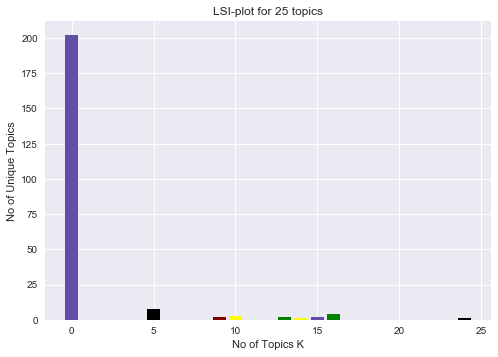

In [160]:
plt.bar(df_topic_counter["topic"],df_topic_counter["frequency"],color = colors)
plt.xlabel("No of Topics K")
plt.ylabel("No of Unique Topics")
plt.title("LSI-plot for 25 topics")


Lsi model 2 Topics = 50

In [161]:
lsi_50 = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=50)

In [162]:
lsi_50.show_topics()

[(0,
  '0.093*"program" + 0.074*"upon" + 0.063*"tonight" + 0.060*"job" + 0.059*"mexico" + 0.059*"economic" + 0.056*"territory" + 0.055*"indian" + 0.054*"bank" + 0.053*"budget"'),
 (1,
  '-0.202*"program" + -0.194*"tonight" + -0.169*"job" + -0.127*"help" + -0.125*"budget" + -0.105*"billion" + -0.104*"economic" + -0.104*"today" + -0.100*"soviet" + -0.098*"percent"'),
 (2,
  '-0.212*"tonight" + -0.123*"terrorist" + 0.120*"program" + -0.114*"job" + -0.107*"iraq" + 0.101*"economic" + 0.083*"method" + -0.082*"iraqi" + 0.081*"interstate" + 0.077*"industrial"'),
 (3,
  '0.199*"program" + -0.129*"tonight" + 0.124*"communist" + -0.123*"terrorist" + -0.117*"silver" + 0.106*"soviet" + -0.105*"iraq" + 0.101*"economic" + -0.088*"gold" + -0.087*"cent"'),
 (4,
  '-0.217*"terrorist" + -0.182*"iraq" + -0.158*"iraqi" + 0.132*"silver" + 0.120*"gold" + -0.117*"interstate" + 0.116*"program" + 0.103*"soviet" + -0.102*"al" + 0.092*"vietnam"'),
 (5,
  '-0.293*"terrorist" + -0.243*"iraq" + -0.218*"iraqi" + -0.1

In [163]:


topic_counter = {}

topics_perdoc = lsi_50[fresh_corpus]

for doc in topics_perdoc:
    
    doc_tuple = max(doc, key=lambda x: x[1])
    if not doc_tuple[0] in topic_counter:
        topic_counter[doc_tuple[0]] = 1
    else:
        topic_counter[doc_tuple[0]] += 1
        


In [164]:
print(topic_counter)
len(topic_counter)

{0: 203, 49: 2, 16: 2, 47: 1, 24: 1, 19: 1, 32: 1, 20: 3, 28: 1, 29: 1, 42: 1, 9: 2, 17: 1, 30: 1, 15: 2, 14: 1, 46: 1}


17

In [165]:
df_topic_counter = pd.DataFrame(list(topic_counter.items()))

In [166]:
df_topic_counter.columns = ["topic","frequency"]

In [167]:
#plt.style.use("seaborn-whitegrid")

In [168]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


Text(0.5,1,'LSI-plot for 50 topics')

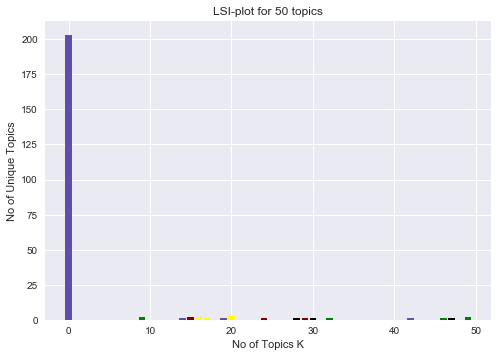

In [170]:
plt.bar(df_topic_counter["topic"],df_topic_counter["frequency"],color= colors)
plt.xlabel("No of Topics K")
plt.ylabel("No of Unique Topics")
plt.title("LSI-plot for 50 topics")

# Topics = 75

In [171]:
lsi_75 = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=75)

In [172]:
lsi_75.show_topics()

[(0,
  '-0.093*"program" + -0.074*"upon" + -0.063*"tonight" + -0.060*"job" + -0.059*"mexico" + -0.059*"economic" + -0.056*"territory" + -0.055*"indian" + -0.054*"bank" + -0.053*"budget"'),
 (1,
  '-0.202*"program" + -0.194*"tonight" + -0.169*"job" + -0.127*"help" + -0.125*"budget" + -0.105*"billion" + -0.104*"economic" + -0.104*"today" + -0.100*"soviet" + -0.098*"percent"'),
 (2,
  '0.212*"tonight" + 0.123*"terrorist" + -0.120*"program" + 0.114*"job" + 0.108*"iraq" + -0.101*"economic" + -0.083*"method" + 0.082*"iraqi" + -0.081*"interstate" + -0.077*"industrial"'),
 (3,
  '-0.199*"program" + 0.129*"tonight" + -0.124*"communist" + 0.123*"terrorist" + 0.116*"silver" + -0.105*"soviet" + 0.105*"iraq" + -0.101*"economic" + 0.087*"gold" + 0.087*"cent"'),
 (4,
  '0.217*"terrorist" + 0.184*"iraq" + 0.158*"iraqi" + -0.132*"silver" + -0.120*"gold" + -0.117*"program" + 0.117*"interstate" + -0.104*"soviet" + 0.102*"al" + -0.093*"mexico"'),
 (5,
  '0.294*"terrorist" + 0.244*"iraq" + 0.217*"iraqi" + 

In [173]:

topic_counter = {}

topics_perdoc = lsi_75[fresh_corpus]

for doc in topics_perdoc:
    
    doc_tuple = max(doc, key=lambda x: x[1])
    if not doc_tuple[0] in topic_counter:
        topic_counter[doc_tuple[0]] = 1
    else:
        topic_counter[doc_tuple[0]] += 1
        


In [174]:
print(topic_counter)
len(topic_counter)

{70: 2, 33: 1, 22: 3, 56: 2, 50: 3, 11: 9, 39: 2, 21: 6, 51: 1, 24: 2, 61: 2, 20: 8, 35: 2, 1: 52, 23: 2, 12: 3, 19: 1, 25: 1, 27: 2, 32: 1, 54: 2, 40: 2, 73: 1, 3: 11, 31: 1, 7: 3, 4: 12, 59: 1, 38: 3, 52: 3, 41: 2, 55: 1, 6: 2, 29: 2, 42: 1, 44: 1, 58: 1, 63: 1, 60: 1, 17: 4, 26: 7, 30: 4, 14: 5, 5: 12, 53: 1, 34: 2, 69: 1, 28: 4, 13: 3, 15: 7, 47: 3, 2: 16}


52

In [175]:
df_topic_counter = pd.DataFrame(list(topic_counter.items()))

In [176]:
df_topic_counter.columns = ["topic","frequency"]

Text(0.5,1,'LSI-plot for 75 topics')

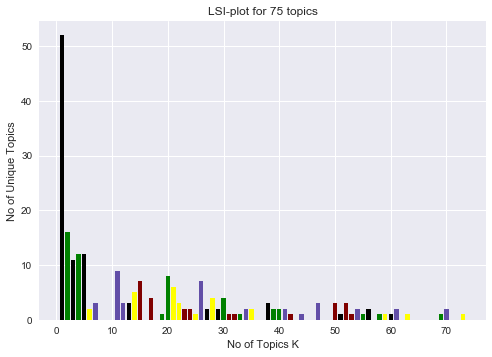

In [177]:
plt.bar(df_topic_counter["topic"],df_topic_counter["frequency"],color = colors)
plt.xlabel("No of Topics K")
plt.ylabel("No of Unique Topics")
plt.title("LSI-plot for 75 topics")

In [178]:
count = []
for k in range(1, 200):
    
    lsi = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=k)
    corpus_lsi = lsi[fresh_corpus]
    unna_topics = set()
    
    for i, c_lsi in enumerate(corpus_lsi):
        
        max_tuple = max(c_lsi, key=lambda x: x[1])
        unna_topics.add(max_tuple[0])
    
    count.append(len(unna_topics))
    


Text(0.5,1,'LSI with K =1 to 200')

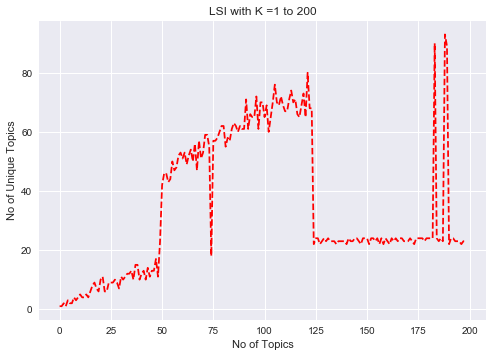

In [188]:
plt.plot(count,color='red', linestyle='dashed')
plt.xlabel("No of Topics")
plt.ylabel("No of Unique Topics")
plt.style.use("seaborn")
plt.title("LSI with K =1 to 200")



In [186]:
lsi_100 = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=100)

In [110]:
lsi_100.show_topics()

[(0,
  '-0.093*"program" + -0.074*"upon" + -0.063*"tonight" + -0.060*"job" + -0.059*"mexico" + -0.059*"economic" + -0.056*"territory" + -0.055*"indian" + -0.054*"bank" + -0.053*"budget"'),
 (1,
  '0.202*"program" + 0.194*"tonight" + 0.169*"job" + 0.127*"help" + 0.125*"budget" + 0.105*"billion" + 0.104*"economic" + 0.104*"today" + 0.100*"soviet" + 0.098*"percent"'),
 (2,
  '0.212*"tonight" + 0.123*"terrorist" + -0.120*"program" + 0.114*"job" + 0.107*"iraq" + -0.101*"economic" + -0.083*"method" + 0.082*"iraqi" + -0.081*"interstate" + -0.077*"industrial"'),
 (3,
  '0.199*"program" + -0.129*"tonight" + 0.124*"communist" + -0.123*"terrorist" + -0.116*"silver" + 0.105*"soviet" + -0.105*"iraq" + 0.101*"economic" + -0.087*"gold" + -0.087*"cent"'),
 (4,
  '-0.218*"terrorist" + -0.183*"iraq" + -0.158*"iraqi" + 0.131*"silver" + 0.120*"gold" + -0.118*"interstate" + 0.117*"program" + 0.104*"soviet" + -0.101*"al" + 0.092*"mexico"'),
 (5,
  '0.294*"terrorist" + 0.244*"iraq" + 0.218*"iraqi" + 0.134*"a

In [111]:
topic_counter = {}

topics_perdoc = lsi_100[fresh_corpus]

for doc in topics_perdoc:
    
    doc_tuple = max(doc, key=lambda x: x[1])
    if not doc_tuple[0] in topic_counter:
        topic_counter[doc_tuple[0]] = 1
    else:
        topic_counter[doc_tuple[0]] += 1
        

In [112]:
print(topic_counter)
len(topic_counter)

{70: 1, 72: 2, 50: 2, 52: 1, 73: 1, 60: 3, 34: 2, 11: 8, 51: 2, 21: 4, 63: 3, 10: 5, 62: 2, 56: 1, 59: 1, 96: 1, 22: 3, 8: 6, 84: 2, 3: 1, 2: 4, 24: 3, 25: 3, 89: 1, 16: 3, 92: 1, 7: 13, 65: 1, 99: 2, 54: 1, 94: 1, 38: 2, 83: 2, 43: 2, 18: 2, 12: 5, 78: 1, 32: 1, 4: 5, 71: 1, 76: 1, 19: 4, 91: 1, 36: 1, 88: 1, 39: 1, 6: 6, 31: 4, 13: 5, 30: 2, 9: 1, 27: 1, 67: 1, 77: 1, 80: 1, 20: 2, 37: 1, 47: 1, 35: 1, 42: 3, 23: 2, 29: 1, 79: 1, 75: 1, 1: 60, 64: 1, 17: 3, 53: 1, 15: 2, 85: 1, 40: 1, 14: 1, 5: 6}


73

In [114]:
df_topic_counter = pd.DataFrame(list(topic_counter.items()))

In [115]:
df_topic_counter.columns = ["topic","frequency"]

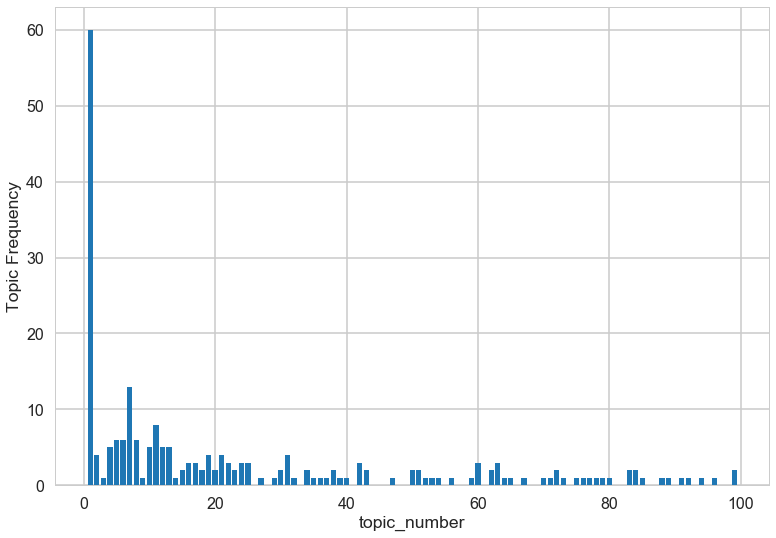

In [144]:
plt.ion()

plt.bar(df_topic_counter["topic"],df_topic_counter["frequency"])
plt.xlabel("topic_number")
plt.ylabel("Topic Frequency")
plt.show()

In [194]:
lsi_120 = models.LsiModel(fresh_corpus, id2word=dictionary, num_topics=120)

In [195]:
lsi_125.show_topics()

[(0,
  '0.093*"program" + 0.074*"upon" + 0.063*"tonight" + 0.060*"job" + 0.059*"mexico" + 0.059*"economic" + 0.056*"territory" + 0.055*"indian" + 0.054*"bank" + 0.053*"budget"'),
 (1,
  '0.202*"program" + 0.194*"tonight" + 0.169*"job" + 0.127*"help" + 0.125*"budget" + 0.105*"billion" + 0.104*"economic" + 0.104*"today" + 0.100*"soviet" + 0.098*"percent"'),
 (2,
  '0.212*"tonight" + 0.123*"terrorist" + -0.120*"program" + 0.114*"job" + 0.108*"iraq" + -0.101*"economic" + -0.083*"method" + 0.082*"iraqi" + -0.081*"interstate" + -0.077*"industrial"'),
 (3,
  '-0.199*"program" + 0.129*"tonight" + -0.124*"communist" + 0.123*"terrorist" + 0.116*"silver" + -0.105*"soviet" + 0.105*"iraq" + -0.101*"economic" + 0.087*"gold" + 0.087*"cent"'),
 (4,
  '0.217*"terrorist" + 0.183*"iraq" + 0.158*"iraqi" + -0.131*"silver" + -0.120*"gold" + -0.118*"program" + 0.118*"interstate" + -0.104*"soviet" + 0.101*"al" + -0.092*"mexico"'),
 (5,
  '0.294*"terrorist" + 0.245*"iraq" + 0.218*"iraqi" + 0.134*"al" + 0.119*"

In [196]:
topic_counter = {}

topics_perdoc = lsi_100[fresh_corpus]

for doc in topics_perdoc:
    
    doc_tuple = max(doc, key=lambda x: x[1])
    if not doc_tuple[0] in topic_counter:
        topic_counter[doc_tuple[0]] = 1
    else:
        topic_counter[doc_tuple[0]] += 1
        

In [197]:
print(topic_counter)
len(topic_counter)

{66: 2, 21: 1, 22: 2, 52: 1, 57: 2, 59: 1, 39: 3, 16: 5, 44: 1, 11: 3, 49: 1, 77: 1, 20: 3, 60: 1, 46: 2, 70: 1, 73: 1, 67: 2, 87: 2, 79: 2, 33: 2, 1: 45, 8: 5, 54: 2, 7: 6, 6: 5, 18: 1, 12: 5, 74: 1, 89: 1, 34: 1, 3: 13, 32: 1, 86: 1, 4: 15, 62: 1, 38: 3, 42: 3, 37: 1, 84: 1, 43: 4, 61: 1, 72: 1, 31: 2, 88: 1, 23: 1, 29: 1, 50: 2, 17: 3, 26: 7, 30: 4, 15: 5, 98: 1, 92: 2, 14: 4, 41: 2, 90: 1, 35: 3, 28: 3, 13: 3, 45: 1, 85: 1, 5: 3, 99: 1, 53: 1, 2: 14, 48: 2, 78: 1}


68

# Latent Dirchlet Allocation

In [40]:
%time

num_topics = 100


lda_model_100 = models.ldamodel.LdaModel(corpus=fresh_corpus, id2word=dictionary,  alpha='auto', eta='auto',num_topics = num_topics )

Wall time: 0 ns


In [41]:
lda_model_120.print_topics(10)

[(62,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"consideration" + 0.000*"commerce" + 0.000*"program" + 0.000*"provision" + 0.000*"federal" + 0.000*"object"'),
 (82,
  '0.001*"job" + 0.001*"program" + 0.000*"budget" + 0.000*"bicentennial" + 0.000*"massive" + 0.000*"inflation" + 0.000*"decisionmaking" + 0.000*"federal" + 0.000*"hard" + 0.000*"help"'),
 (111,
  '0.000*"currency" + 0.000*"specie" + 0.000*"naturalization" + 0.000*"certificate" + 0.000*"prostration" + 0.000*"herewith" + 0.000*"convention" + 0.000*"fluctuating" + 0.000*"umpire" + 0.000*"commend"'),
 (100,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"consideration" + 0.000*"commerce" + 0.000*"program" + 0.000*"provision" + 0.000*"federal" + 0.000*"object"'),
 (116,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"consideration" + 0.000*"commerce" + 0.000*"program" + 0.000*"provision" + 0.000*"federal" + 0.000*"object"'),
 (113,
  '0.001*

In [148]:
lda_model_120.show_topics(20)

[(97,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"treasury" + 0.000*"amount" + 0.000*"indian" + 0.000*"territory" + 0.000*"department" + 0.000*"consideration"'),
 (96,
  '0.001*"religion" + 0.001*"democracy" + 0.000*"eighty" + 0.000*"learned" + 0.000*"idle" + 0.000*"billion" + 0.000*"glass" + 0.000*"interrelationship" + 0.000*"innate" + 0.000*"tool"'),
 (8,
  '0.001*"bank" + 0.001*"suspension" + 0.001*"currency" + 0.001*"banking" + 0.000*"specie" + 0.000*"custody" + 0.000*"note" + 0.000*"collector" + 0.000*"silver" + 0.000*"attendant"'),
 (111,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"treasury" + 0.000*"amount" + 0.000*"indian" + 0.000*"territory" + 0.000*"department" + 0.000*"consideration"'),
 (26,
  '0.002*"texas" + 0.001*"oregon" + 0.001*"wine" + 0.001*"mexico" + 0.001*"article" + 0.001*"annexation" + 0.001*"mexican" + 0.000*"compromise" + 0.000*"territory" + 0.000*"rocky"'),
 (33,
  '0.002*"terrorist" + 0.001*"toni

In [232]:
print(lda_model.show_topic(1))

[('natchez', 0.001193211203469581), ('michilimackinac', 0.00070674068288260016), ('liner', 0.00051767559637772389), ('uncompromis', 0.00048565928673525115), ('reconsecr', 0.00045509171346712259), ('taw', 0.00045509171346712259), ('repent', 0.00045509171346712259), ('pitiabl', 0.00045509171346712259), ('recodif', 0.00045509171346712259), ('cloister', 0.00045509171346712259)]


In [231]:
print(lda_model.show_topic(40))

[('invis', 0.00077314611721976032), ('impercept', 0.00061476405253114541), ('effac', 0.0006095393129211653), ('seced', 0.00057683638575952757), ('indestruct', 0.00052159374031939302), ('ultimo', 0.00042529930125433205), ('ador', 0.00037463848217864738), ('purifi', 0.00037463848217864738), ('salli', 0.00037463848217864738), ('solitud', 0.00037463848217864738)]


In [230]:
print(lda_model.show_topic(46))

[('island', 0.0064698404477956609), ('secretari', 0.0063787358065964909), ('tariff', 0.0059262205399604265), ('commerci', 0.0058703793509184404), ('estim', 0.0056743066880534741), ('thu', 0.0054632423775152553), ('ship', 0.0052339332286126822), ('pension', 0.0046661687873718813), ('labor', 0.004502806077727595), ('railway', 0.0043190182795592195)]


In [72]:
lda_model_100.print_topics()

[(95,
  '0.000*"upon" + 0.000*"subject" + 0.000*"shall" + 0.000*"treaty" + 0.000*"department" + 0.000*"secretary" + 0.000*"commerce" + 0.000*"program" + 0.000*"economic" + 0.000*"treasury"'),
 (50,
  '0.000*"per" + 0.000*"washburn" + 0.000*"cent" + 0.000*"currency" + 0.000*"circulation" + 0.000*"depreciated" + 0.000*"paper" + 0.000*"paraguay" + 0.000*"specie" + 0.000*"gold"'),
 (54,
  '0.001*"mcleod" + 0.000*"indispensably" + 0.000*"appraiser" + 0.000*"medium" + 0.000*"punctuality" + 0.000*"caroline" + 0.000*"repealable" + 0.000*"weightiest" + 0.000*"circulation" + 0.000*"deposit"'),
 (80,
  '0.000*"persevering" + 0.000*"astronomical" + 0.000*"monument" + 0.000*"object" + 0.000*"scarcely" + 0.000*"purchaser" + 0.000*"upon" + 0.000*"improvement" + 0.000*"unequivocal" + 0.000*"indigence"'),
 (58,
  '0.001*"program" + 0.000*"survivor" + 0.000*"communist" + 0.000*"federal" + 0.000*"serviceman" + 0.000*"economic" + 0.000*"insurance" + 0.000*"civilian" + 0.000*"vigorous" + 0.000*"rd"'),
 (25

# Temporal Visualization of topic models

In [108]:
df_coor = pd.DataFrame(columns=('year', 'topic', 'shatam'))

In [109]:
df_coor

Empty DataFrame
Columns: [year, topic, shatam]
Index: []

In [110]:

i=0
for doc in fresh_corpus:
    i+=1
    if i==len(df):
        break
    d=df['Year'].iloc[i]
    vec=lda_model_100.get_document_topics(doc)
    for r in lda_model_100.get_document_topics(doc):
        row=dict(zip(['year', 'topic', 'shatam'], [d, r[0], r[1]]))
        row_ser = pd.Series(row)
        row_ser.name=i
        df_coor = df_coor.append(row_ser)
    
    

In [111]:
df_coor.head()

year  topic    shatam
1  1791.0   11.0  0.778951
1  1791.0   13.0  0.045592
1  1791.0   29.0  0.049477
1  1791.0   36.0  0.052713
1  1791.0   65.0  0.019299

In [112]:
df_coor_Y = pd.DataFrame(columns=('year', 'topic', 'shatam'))

In [113]:
df_coor_Y

Empty DataFrame
Columns: [year, topic, shatam]
Index: []

In [114]:
for name, groupe in df_coor.groupby(['year', 'topic']):
    #print , , 
    row=dict(zip(['year', 'topic', 'shatam'], [name[0], int(name[1]), groupe['shatam'].sum()]))
    row_ser = pd.Series(row)
    row_ser.name=i
    df_coor_Y = df_coor_Y.append(row_ser)
    i+=1

In [115]:
df_coor_Y.head(5)

year  topic    shatam
225  1791.0   11.0  0.778951
226  1791.0   13.0  0.045592
227  1791.0   29.0  0.049477
228  1791.0   36.0  0.052713
229  1791.0   65.0  0.019299

In [116]:
norm_shatam = []
i = 0
for dat in df_coor_Y.iterrows():
    val_n = dat[1]['shatam']/df_coor_Y[df_coor_Y['year'] == dat[1]['year']].sum()['shatam']
    norm_shatam.append(val_n)
    i += 1
    

In [117]:
df_coor_Y['shatamY'] = norm_shatam

In [198]:
topic_year=df_coor_Y.pivot(index='topic', columns='year', values='shatam')
topic_year.fillna(0, inplace=True)
t_y=topic_year.transpose()



In [199]:
t_y

topic       0.0       1.0       2.0   3.0       4.0   5.0   6.0   7.0   8.0   \
year                                                                           
1791.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1792.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1793.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1794.0  0.017075  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1795.0  0.000000  0.000000  0.548538   0.0  0.000000   0.0   0.0   0.0   0.0   
1796.0  0.012223  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1797.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1798.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1799.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1800.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1801.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1802.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1803.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1804.0  0.022157  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1805.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1806.0  0.031216  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1807.0  0.015535  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1808.0  0.578514  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1809.0  0.017160  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1810.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1811.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1812.0  0.014884  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1813.0  0.000000  0.000000  0.015515   0.0  0.000000   0.0   0.0   0.0   0.0   
1814.0  0.019222  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1815.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1816.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1817.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1818.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1819.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1820.0  0.020292  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
...          ...       ...       ...   ...       ...   ...   ...   ...   ...   
1983.0  0.000000  0.000000  0.015865   0.0  0.028493   0.0   0.0   0.0   0.0   
1984.0  0.000000  0.000000  0.000000   0.0  0.036797   0.0   0.0   0.0   0.0   
1985.0  0.000000  0.000000  0.000000   0.0  0.028425   0.0   0.0   0.0   0.0   
1986.0  0.000000  0.000000  0.018518   0.0  0.028151   0.0   0.0   0.0   0.0   
1987.0  0.000000  0.000000  0.012757   0.0  0.024115   0.0   0.0   0.0   0.0   
1988.0  0.000000  0.000000  0.000000   0.0  0.021405   0.0   0.0   0.0   0.0   
1989.0  0.000000  0.000000  0.015702   0.0  0.000000   0.0   0.0   0.0   0.0   
1990.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1991.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1992.0  0.000000  0.000000  0.021962   0.0  0.021328   0.0   0.0   0.0   0.0   
1993.0  0.000000  0.000000  0.000000   0.0  0.000000   0.0   0.0   0.0   0.0   
1994.0  0.000000  0.000000  0.000000   0.0  0.026298   0.0   0.0   0.0   0.0   
1995.0  0.000000  0.013106  0.000000   0.0  0.028642   0.0   0.0   0.0   0.0   
1996.0  0.000000  0.011362  0.000000   0.0  0.018061   0.0   0.0   0.0   0.0   
1997.0  0.000000  0.013407  0.000000   0.0  0.014036   0.0   0.0   0.0   0.0   
1998.0  0.000000  0.000000  0.000000   0.0  0.027537   0.0   0.0   0.0   0.0   
1999.0  0.000000  0.000000  0.000000   0.0  0.019950   0.0   0.0   0.0   0.0   


In [55]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5',
                 '#800080', '#FF00FF', '#000080', '#0000FF', '#008080',
                  '#00FFFF', '#008000', '#00FF00', '#808000', '#FFFF00',
                  '#800000', '#FF0000', '#000000', '#808080', '#C0C0C0',
                  '#FFFFFF', '#B22222', '#F08080', '#FF69B4', '#FF7F50',
                  '#FFFF00',
                  '#BDB76B', '#BC8F8F', '#8B4513', '#00008B', '#FFE4E1',
                  '#008080',
                  '#00CED1', '#00CED1']

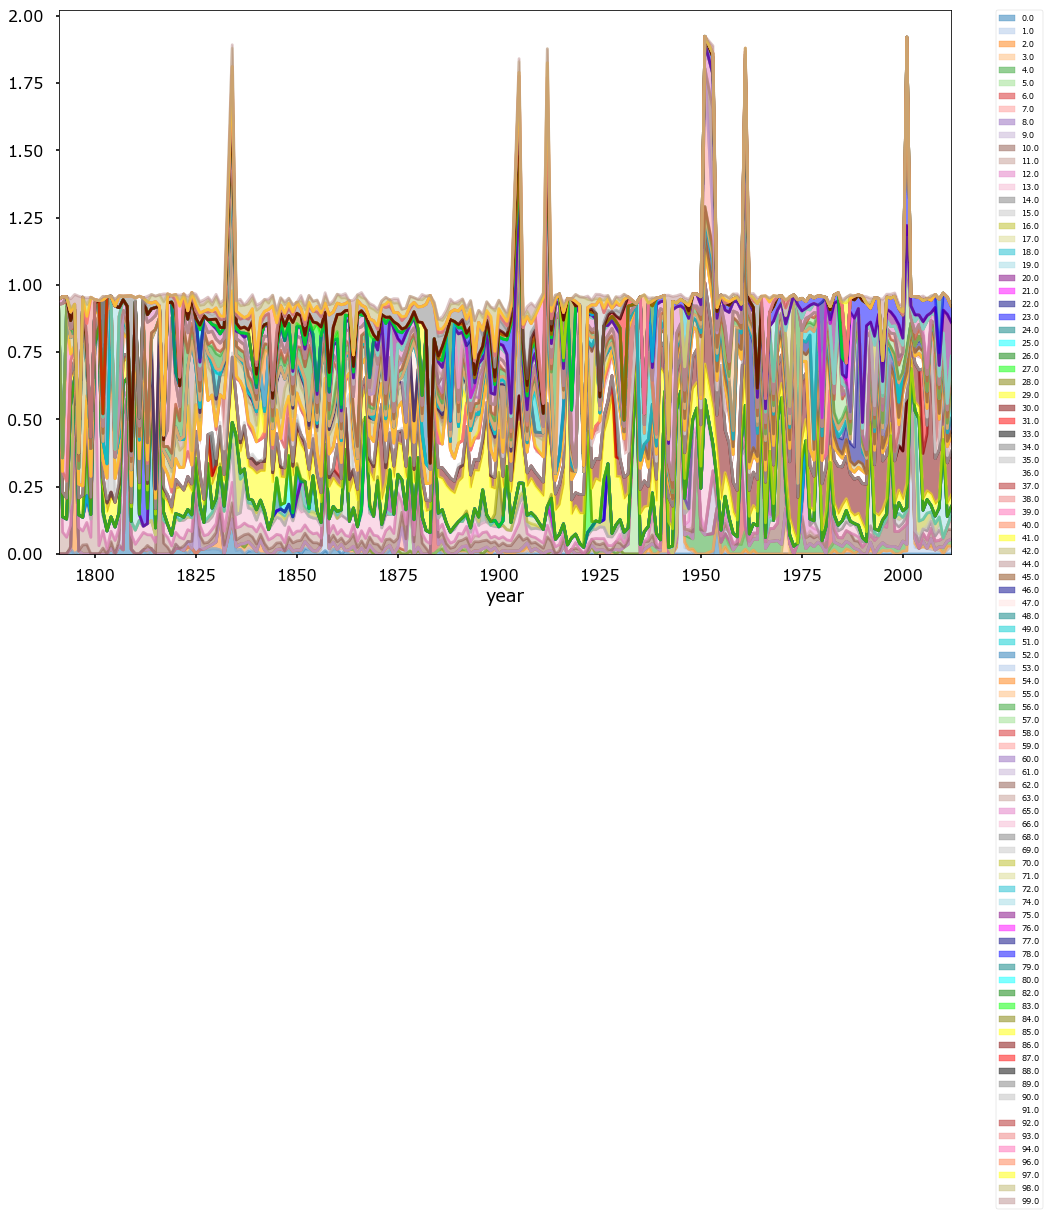

In [188]:
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['legend.frameon'] = True
#labels = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']
#plt.axis([0, 6, 0, 20])
#plt.xticks(labels)
t_y.plot.area(alpha=0.5, color=color_sequence)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

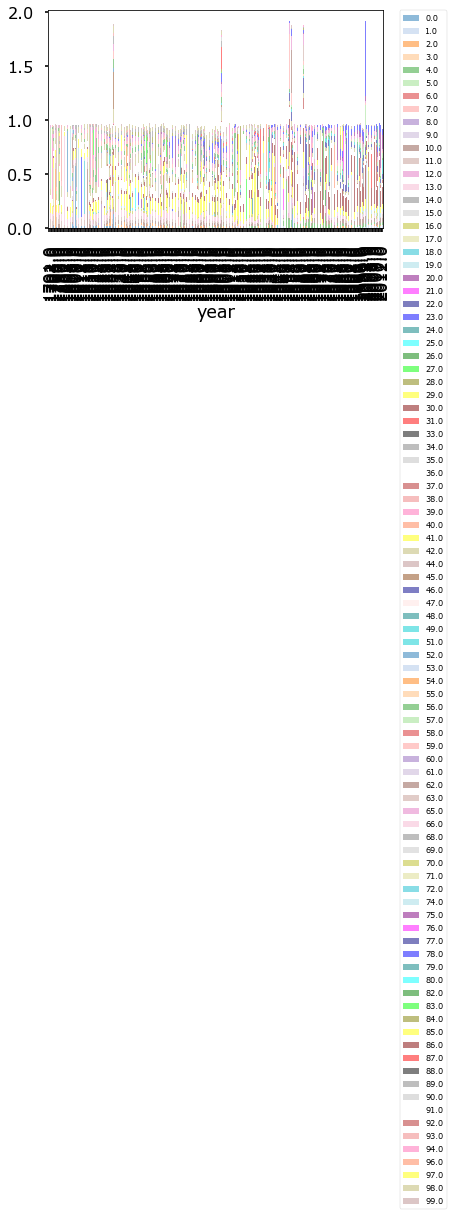

In [200]:
t_y.plot.bar(stacked=True, alpha=0.5, color=color_sequence)
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['legend.frameon'] = True
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

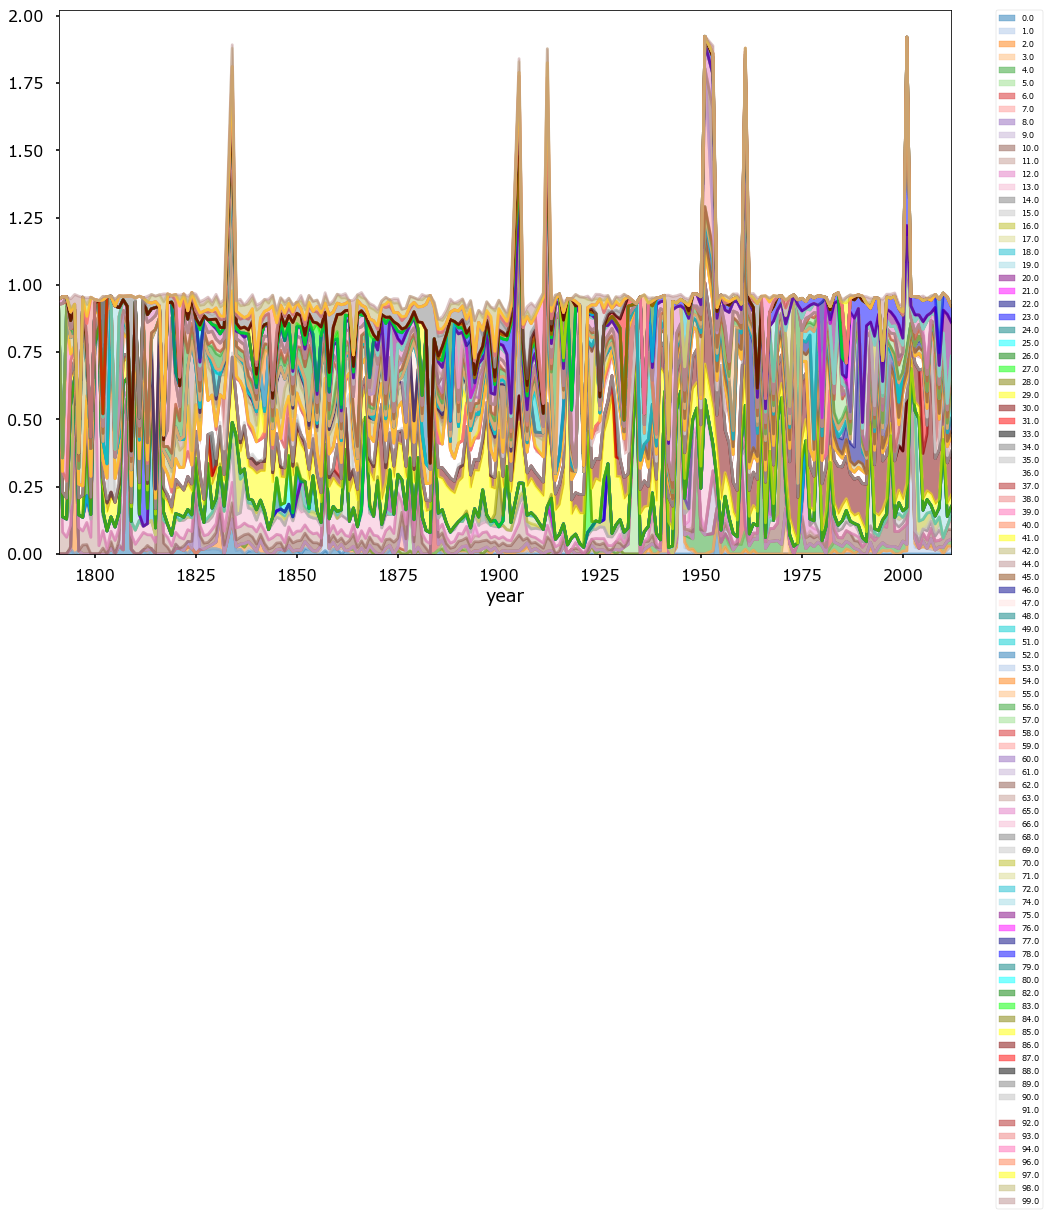

In [186]:
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.figsize'] = 16, 10
plt.rcParams['legend.frameon'] = True

#plt.axis([0, 6, 0, 20])
#plt.xticks(labels)
t_y.plot.area(alpha=0.5, color=color_sequence)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

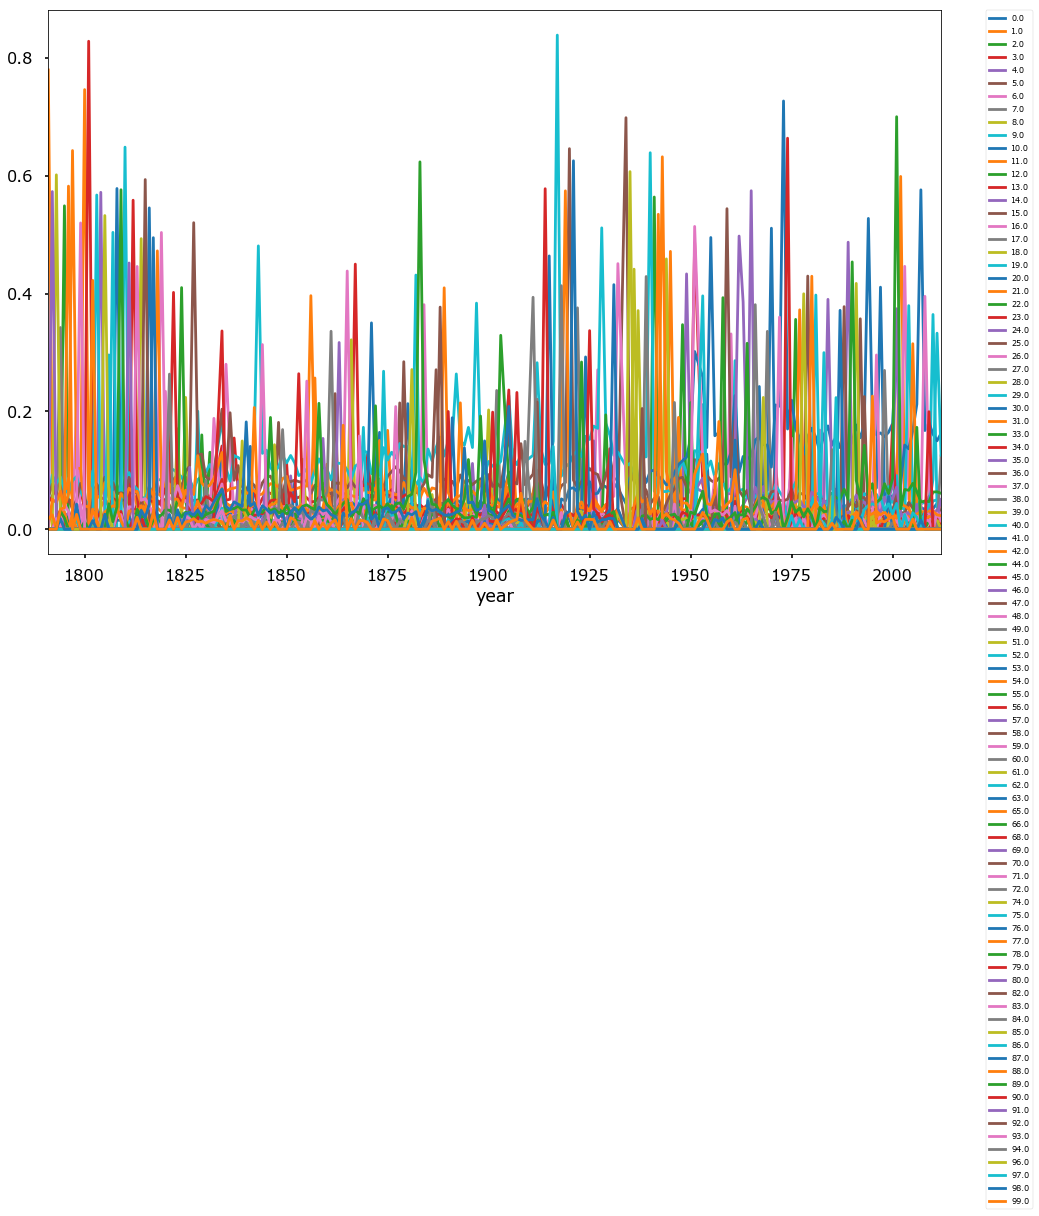

In [62]:
t_y.plot()
plt.rcParams['font.family'] = 'Verdana'
plt.rcParams['font.size'] = 16
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['figure.figsize'] = 16, 10
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

In [182]:
lda_model_100.get_term_topics("hitler",minimum_probability=0.0000000000000001)

[(18, 4.8963546672553764e-08), (65, 0.00033898664197264382)]

In [180]:
lda_model_100.get_term_topics("economic",minimum_probability=0.0000000000000001)

[(0, 1.0640982411106025e-08),
 (2, 6.4897617658286495e-08),
 (4, 2.9973307107548169e-05),
 (5, 5.1029586776879818e-07),
 (6, 3.7924806158439178e-06),
 (9, 2.9995060032393207e-07),
 (12, 1.1316260691000928e-05),
 (13, 1.0763240824507795e-05),
 (15, 6.7044514861947891e-06),
 (21, 5.201090269419371e-08),
 (30, 1.873514917264235e-05),
 (36, 1.2166633059086953e-05),
 (37, 2.5619333326351512e-05),
 (46, 4.109071886438756e-05),
 (51, 1.1151595629882094e-06),
 (55, 4.861669097534009e-07),
 (57, 5.3134415047225297e-06),
 (59, 2.9435563178267168e-06),
 (60, 5.6652996589094888e-08),
 (62, 3.668145234130842e-08),
 (65, 2.5190259115263116e-07),
 (78, 5.3590391048479033e-07),
 (87, 2.9977806747391862e-07),
 (90, 1.6673280884592649e-07)]

In [166]:
lda_model_100.print_topic(46)

'0.001*"program" + 0.001*"budget" + 0.001*"communist" + 0.001*"economic" + 0.001*"let" + 0.001*"tonight" + 0.001*"nuclear" + 0.001*"deficit" + 0.001*"job" + 0.001*"lao"'

In [183]:
lda_model_100.print_topic(65)

'0.001*"hitler" + 0.001*"program" + 0.001*"fighting" + 0.001*"enemy" + 0.001*"nazi" + 0.001*"slave" + 0.001*"lake" + 0.001*"objective" + 0.001*"japanese" + 0.001*"conquest"'

In [216]:
lda_model_120.print_topic(28)

'0.001*"iraq" + 0.001*"legation" + 0.001*"iraqi" + 0.001*"empower" + 0.001*"terrorist" + 0.001*"qaeda" + 0.001*"island" + 0.001*"yamen" + 0.001*"li" + 0.001*"philippine"'

In [175]:
for ll in lda_model_100.get_topic_terms(83):
    print (ll[0], dictionary[ll[0]], ll[1])

9351 greytown 0.000982244175783
2251 spain 0.000919750594965
9371 cyane 0.000846901010246
9354 punta 0.000625368726187
725 explanation 0.000624626420166
9570 negro 0.000589381604468
2253 catholic 0.000571670775642
4803 adventurer 0.000531113341093
2274 minister 0.000491510953475
1989 article 0.000480575825752


# pyLDAvis Visualization

In [64]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [65]:
pyLDAvis.gensim.prepare(lda_model_100, corpus, dictionary) 

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
29     17.720851        1       1 -0.022760 -0.027733
30     12.792556        1       2  0.028057 -0.029071
36     12.734290        1       3 -0.018443 -0.022887
42      5.841697        1       4 -0.016971 -0.005281
65      5.184039        1       5 -0.008111 -0.008891
13      4.797328        1       6 -0.016033 -0.009934
56      3.158091        1       7 -0.014539 -0.002434
10      2.943333        1       8  0.001395 -0.010726
78      2.541868        1       9  0.009929 -0.018556
59      2.049876        1      10 -0.010984  0.004168
98      1.817354        1      11 -0.021526 -0.004063
11      1.678390        1      12 -0.008733 -0.008094
84      1.535747        1      13 -0.010888 -0.003035
89      1.404477        1      14 -0.013089 -0.004330
4       1.251980        1      15  0.017246 -0.004812
37      1.178031        1      16  0.002896 -0.013216
46      1.177778        1      17  0.031933 -0.003859
51      0.987246        1      18  0.014257 -0.001032
57      0.902788        1      19  0.013548 -0.003866
16      0.891116        1      20 -0.008423 -0.008140
75      0.842580        1      21  0.016650 -0.008937
44      0.793439        1      22 -0.014091 -0.002871
19      0.757965        1      23  0.009752  0.005925
99      0.641989        1      24  0.001570 -0.002342
2       0.612820        1      25 -0.005395  0.005083
94      0.591024        1      26  0.000433  0.000699
12      0.570032        1      27  0.008991 -0.009408
0       0.532836        1      28 -0.004970  0.003971
17      0.530724        1      29  0.004555 -0.002879
5       0.524603        1      30 -0.003376  0.003322
...          ...      ...     ...       ...       ...
49      0.073884        1      71  0.002713 -0.000905
24      0.071189        1      72 -0.006614 -0.003143
33      0.066045        1      73 -0.005076  0.001041
31      0.063457        1      74  0.009214  0.003572
38      0.053733        1      75  0.015228  0.007107
14      0.045311        1      76 -0.009797 -0.002569
26      0.038735        1      77  0.001978 -0.004846
72      0.037093        1      78  0.002525  0.003213
54      0.036230        1      79 -0.003714  0.008711
76      0.028192        1      80  0.010834  0.007557
86      0.027671        1      81  0.000294  0.003353
97      0.024373        1      82  0.005970  0.003450
63      0.024176        1      83  0.007751 -0.001685
66      0.021397        1      84  0.006164  0.004709
79      0.020366        1      85  0.008749  0.004500
22      0.018419        1      86 -0.001089 -0.003613
7       0.011462        1      87 -0.001429  0.002324
69      0.010529        1      88 -0.007105  0.004120
80      0.010401        1      89 -0.000639  0.007632
3       0.007237        1      90  0.007462  0.005262
58      0.004294        1      91  0.005420  0.000651
92      0.002416        1      92  0.009073  0.002827
81      0.000259        1      93 -0.002253  0.005193
32      0.000258        1      94  0.002261  0.003624
64      0.000257        1      95 -0.001052  0.003976
67      0.000257        1      96  0.004935  0.005184
50      0.000256        1      97  0.000766  0.004719
73      0.000256        1      98  0.006640  0.005436
43      0.000256        1      99  0.002735  0.005171
95      0.000254        1     100  0.003558  0.007716

[100 rows x 5 columns], topic_info=       Category        Freq           Term       Total  loglift  logprob
term                                                                    
14483   Default  521.000000        program  521.000000  30.0000  30.0000
17412   Default  252.000000        tonight  252.000000  29.0000  29.0000
13594   Default  287.000000            job  287.000000  28.0000  28.0000
6595    Default  225.000000         silver  225.000000  27.0000  27.0000
12905   Default  286.000000         budget  286.000000  26.0000  26.0000
6594    Default  205

# Average Topic Coherence

In [69]:
top_topics = lda_model_100.top_topics(corpus, topn=50)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -3.5336.
[([(8.0054379061771463e-05, 'upon'),
   (7.7479215070786045e-05, 'subject'),
   (7.7332858797444303e-05, 'shall'),
   (7.6913759594127208e-05, 'treaty'),
   (7.6637874178560924e-05, 'department'),
   (7.6202660176631474e-05, 'secretary'),
   (7.6185312570765809e-05, 'commerce'),
   (7.6131725822159096e-05, 'program'),
   (7.6124483181177027e-05, 'economic'),
   (7.6111057725866747e-05, 'treasury'),
   (7.5958954528546909e-05, 'help'),
   (7.5955044787287784e-05, 'amount'),
   (7.5897989782402748e-05, 'claim'),
   (7.5849586572670547e-05, 'vessel'),
   (7.5641039389875262e-05, 'territory'),
   (7.5455845288082343e-05, 'indian'),
   (7.5454941338369029e-05, 'federal'),
   (7.5379617534242368e-05, 'consideration'),
   (7.5376338981703253e-05, 'america'),
   (7.5316827312850437e-05, 'officer'),
   (7.5243952815896072e-05, 'need'),
   (7.5196989408342693e-05, 'world'),
   (7.5177357618526686e-05, 'provision'),
   (7.5021530935875952e-05, 'navy'),
   (7.4876

   (0.00072382684884252676, 'let'),
   (0.00064872117674439397, 'locality'),
   (0.00061641742029767694, 'peacetime'),
   (0.0005849921554249689, 'vision'),
   (0.0005828172445231847, 'responsive'),
   (0.00056156152868261854, 'truly'),
   (0.00055008457566183867, 'achieve'),
   (0.00053208561502141114, 'park'),
   (0.00052086115045431509, 'expansionary'),
   (0.00050486055879439941, 'inflation'),
   (0.00050386642062678324, 'level'),
   (0.00049389392763206288, 'propose'),
   (0.00048030973292489119, 'robbed'),
   (0.00048024008416381816, 'russell'),
   (0.00048004668239984467, 'elite'),
   (0.00046841975995107812, 'tonight'),
   (0.00044239515234920876, 'budget'),
   (0.00040843962198777061, 'america'),
   (0.00040831565662023819, 'creative'),
   (0.00040578186998118217, 'program'),
   (0.00040111978572343566, 'medical'),
   (0.00038283922776348678, 'today'),
   (0.00037274203455520756, 'federal'),
   (0.00037251854237535948, 'spoke'),
   (0.00036689171943833361, 'sharing'),
   (0.00

   (0.00039897419618912616, 'annexation'),
   (0.0003984426764644862, 'tend'),
   (0.00039330289134127617, 'confirm'),
   (0.00039042804611211874, 'abatement'),
   (0.00038896197091330294, 'execution'),
   (0.00038852665599442012, 'territory'),
   (0.00038134423623830066, 'scruple'),
   (0.00037607086864036515, 'proper'),
   (0.00037247742618296849, 'coinage'),
   (0.000372119616766105, 'unprovoked'),
   (0.00037102427711780073, 'intercourse'),
   (0.00036884802757395735, 'communicate'),
   (0.00036368835913109751, 'grande'),
   (0.00035940029912898868, 'besides'),
   (0.0003589741054603847, 'florin'),
   (0.00035889399955620272, 'nugatory'),
   (0.00035888839571299235, 'legislature'),
   (0.0003588460448534737, 'advisable'),
   (0.00035882192864749961, 'antwerp')],
  -3.6151969159071657),
 ([(0.0014257268460949092, 'wool'),
   (0.00076542923488187109, 'purchasing'),
   (0.0007637939771505789, 'statute'),
   (0.00065868110499239991, 'deception'),
   (0.00063391391291428838, 'tobacco'),

In [62]:
lda_model.top_topics(corpus, topn = 20)

[([(0.0058167711587760228, 'upon'),
   (0.0042767576861367741, 'treati'),
   (0.0041819751526121565, 'vessel'),
   (0.0040712876285312286, 'amount'),
   (0.0040295814336313591, 'claim'),
   (0.0040126962800114191, 'spain'),
   (0.0037418988372261634, 'depart'),
   (0.0035902714438326654, 'minist'),
   (0.0035728192867263814, 'articl'),
   (0.0035225599306919929, 'court'),
   (0.0034894211251289917, 'convent'),
   (0.0034677818415707576, 'navi'),
   (0.0033553870720572317, 'expenditur'),
   (0.003349378139462711, 'commission'),
   (0.0031477059951425831, 'commerci'),
   (0.0030769236573251172, 'armi'),
   (0.0030084952924498819, 'reform'),
   (0.00296749211454235, 'offic'),
   (0.0029526719040010043, 'ought'),
   (0.0028877684179008305, 'britain')],
  -0.33789660856617759),
 ([(0.00052596678093428718, 'overtim'),
   (0.0003705582882296307, 'fumbl'),
   (0.0003705582882296307, 'fitzgerald'),
   (0.0003705582882296307, 'migrant'),
   (0.0003705582882296307, 'standstil'),
   (0.00037055828

In [71]:
lda_model_100.get_term_topics("island",minimum_probability= 0.000000001)

[(11, 4.3025836481187122e-07),
 (28, 8.1007535735238959e-08),
 (29, 4.3148471889045205e-06),
 (44, 5.0396278391973681e-08),
 (45, 1.389864767194009e-05),
 (56, 5.7637095408320367e-08),
 (65, 2.9376517303899666e-06),
 (72, 2.0064801108339766e-08),
 (78, 2.1733490735310738e-07),
 (98, 1.5490247693248345e-06)]

# References


[1] https://github.com/mw10104587/state-of-union/blob/master/Topic%20Modeling.ipynb

